<h1>Lab 2</h2>

<h4>Exercise 1<br>
PCA and LDA comparison</h4>

Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Getting csv as data

In [3]:
# data = pd.read_csv('C:\\Users\\s0000915481\\Courses\\Statistical_Methods\\Lab_2\\data.csv')
data = pd.read_csv('./data.csv')

In [4]:
print("Matrix Shape")
print(data.shape)

print("Matrix Head")
print(data.head())

Matrix Shape
(42000, 785)
Matrix Head
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pix

In [5]:
A = np.array(data)
A.shape

(42000, 785)

Dataset of 42000 observations of 28 x 28 dimension
<br>Flattening is transforming a matrix into a column vector: we have an observation of 28 x 28, so 784 pixels => 784 dimension of vector

Split data into a matrix and a vector (X and Y) where:
- X is dimension (42000, 784)
- Y is dimension (42000)
- Y is the first column of data, while X is the rest

In [6]:
X = A[:,1:].T
print(X.shape)
Y = A[:,0]
print(Y.shape)

(784, 42000)
(42000,)


5


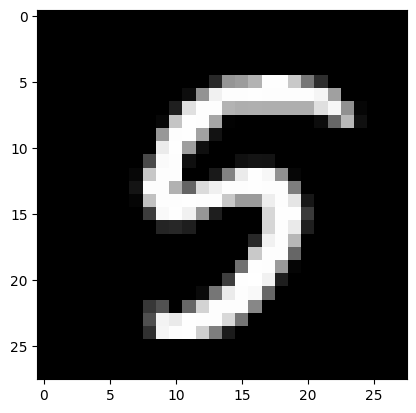

In [7]:
idx = 8
img = X[:, idx]
img = np.reshape(img, (28,28))

print(Y[idx])

plt.imshow(img, cmap='gray')
plt.show()

choosen_numbers = [0, 6, 9]

indeces = [index for index, elem in enumerate(Y) if elem in choosen_numbers]
X = X[:, indeces]
Y = Y[indeces]

Create a function that takes as input a dataset X and an integer N_train and returns two arrays Xtrain and Xtest where:
- Xtrain is composed by N_train random samples from X
- Xtest is the ret of array X
- Ytrain and Ytet accordingly

Limitation: the sample has to be random (numpy.random.shuffle)

Example: If N_train = 30.000 on our MNIST data, the shape should be:
- Xtrain (784, 30.000) Ytrain (30.000)
- Xtest  (784, 12.000) Ytest  (12.000)

In [8]:
def x_split(X, N_train):
    d, N = X.shape

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:N_train]
    test_idx = idx[N_train:]

    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx]

    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]

    return Xtrain, Xtest, Ytrain, Ytest


Xtrain, Xtest, Ytrain, Ytest = x_split(X, 30000)    

Now we want to project X into less dimensions, so we will SVD to make an orthogonal projection.

NOTE: Z = U_k.T * X, not U_k * X

Getting centroid c_X and centered version of X

In [9]:
def get_centroid(X):
    return np.mean(X, axis=1)

c_X = get_centroid(Xtrain)
c_X = np.reshape(c_X, (len(c_X), 1))
print(c_X.shape)

X_c = Xtrain - c_X

(784, 1)


Computing SVD of Xtrain

In [10]:
def PCA(X, k):
    U, s, VT = np.linalg.svd(X, full_matrices = False)
    U_k = np.resize(U, (len(U), k))
    return np.dot(U_k.T, X)

k = 2
Z_k = PCA(X_c, k)


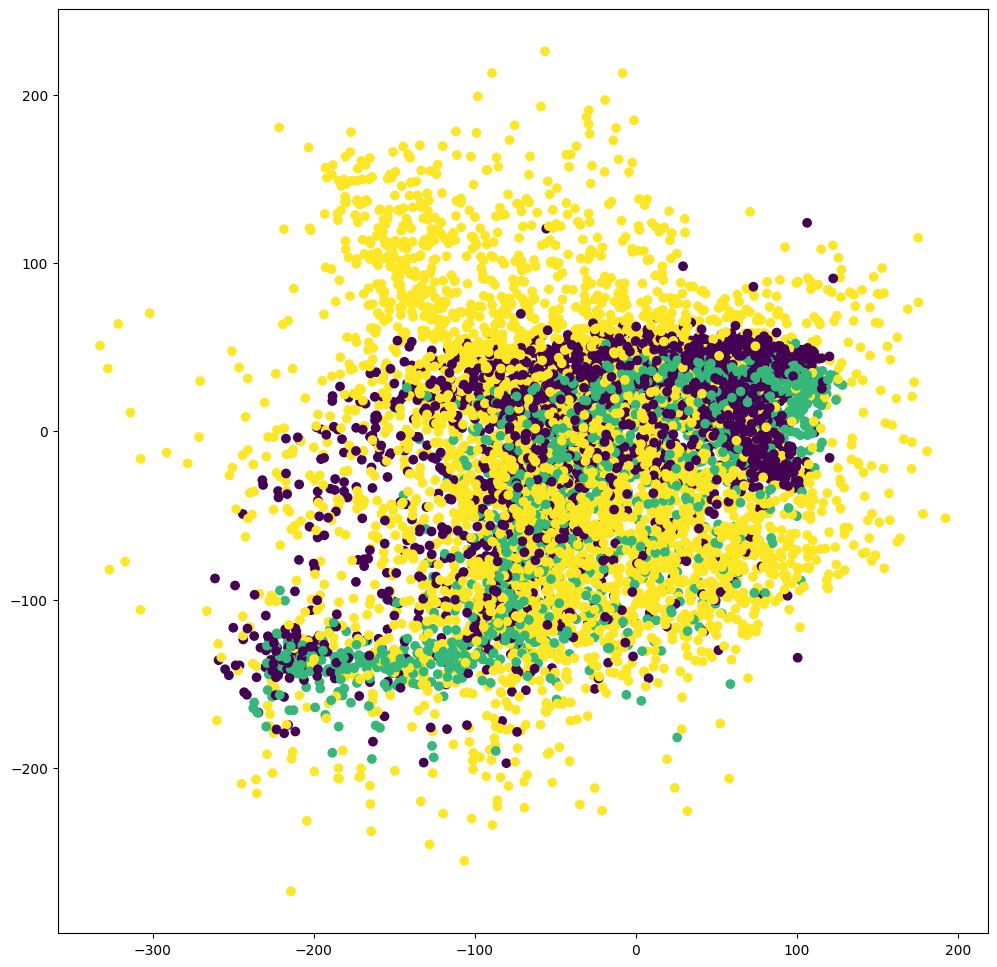

In [11]:
Z_k.shape
#use plt.scatter with c=Ytrain
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot()
ax.scatter(Z_k[0,:], Z_k[1,:], c=Ytrain)